<a href="https://colab.research.google.com/github/alypaolicchi/ECE364_2025/blob/main/Copy_of_A1_ECE364_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare python environment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
random_state=5 # use this to control randomness across runs e.g., dataset partitioning

## Preparing the Heart Dataset (2 points)

---


We will use heart dataset from UCI machine learning repository. Details of this data can be found [here](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)).
The dataset contains the following features with their corresponding feature types:
1. age in years (real)
2. sex (binary; 1=male/0=female)
3. cp: chest pain type (categorical)
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) (real)
5. chol: serum cholesterol in mg/dl (real)
6. fbs: (fasting blood sugar > 120 mg/dl) (binary; 1=true/0=false)
7. restecg: resting electrocardiographic results (categorical)
8. thalach: maximum heart rate achieved (real)
9. exang: exercise induced angina (1 = yes; 0 = no) (binary)
10. oldpeak: ST depression induced by exercise relative to rest (real)
11. slope: the slope of the peak exercise ST segment (ordinal)
12. ca: number of major vessels colored by flourosopy (real)
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect. (categorical)
14. target: 1 = heart disease, 0 = no heart disease (binary)

The objective is to determine whether a person has heart disease or not based on these features.

### Loading the dataset

In [ ]:
# Load the dataset from a CSV file
data = pd.read_csv('/heart.csv')

# Display the first five instances in the dataset
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Check the data type for each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Look at some statistics of the data using the `describe` function in pandas.

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1. Count tells us the number of Non-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each feature.

6. Max tells us the maximum value of that feature.

### Visualize the Data

#### Check how many instances of each target class are there in the data. This has been done for you.

Text(0, 0.5, 'Count')

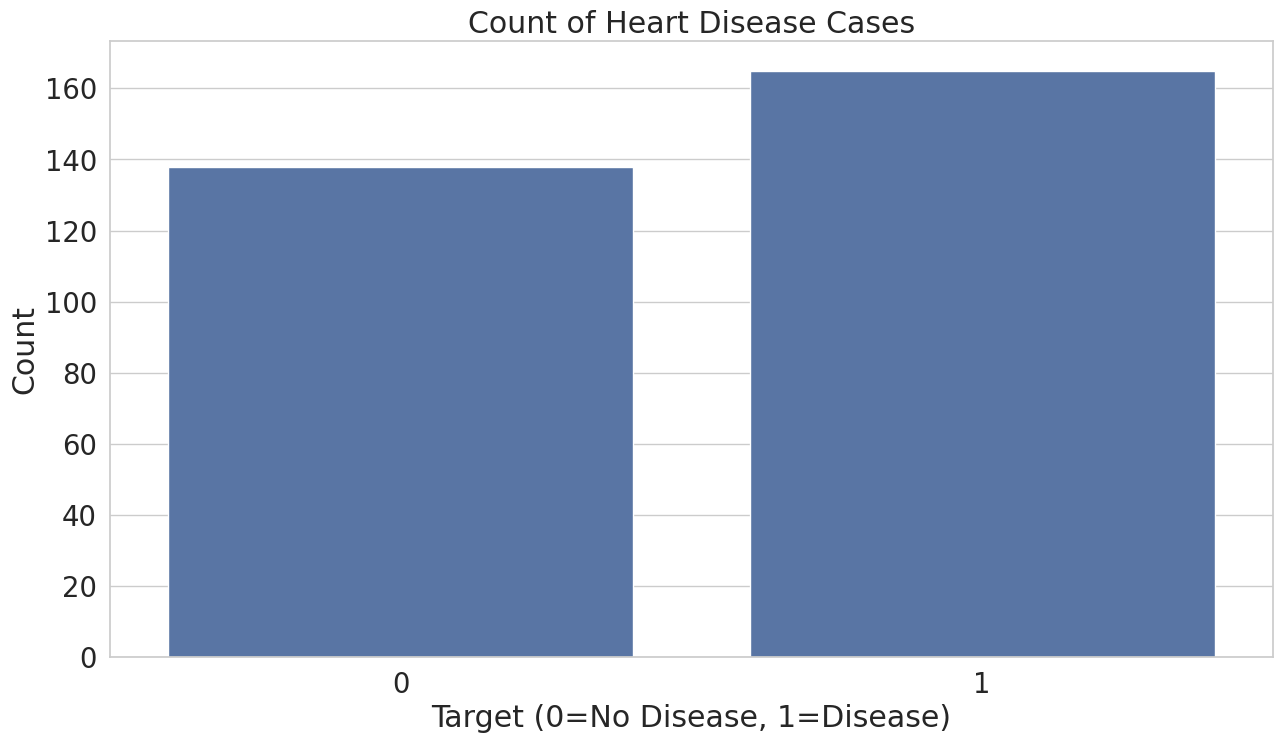

In [ ]:
sns.set_theme(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(x='target',data=data).set_title('Count of Heart Disease Cases')
plt.xlabel('Target (0=No Disease, 1=Disease)')
plt.ylabel('Count')

#### Calculate `mean` values for each feature grouped by target. This has been done for you.

In [ ]:
# Compute mean values for each feature grouped by target
data.groupby('target', as_index=False).mean()

,target,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


#### Create box plots to see distribution of each feature. See [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html) for further details. This has been done for you.

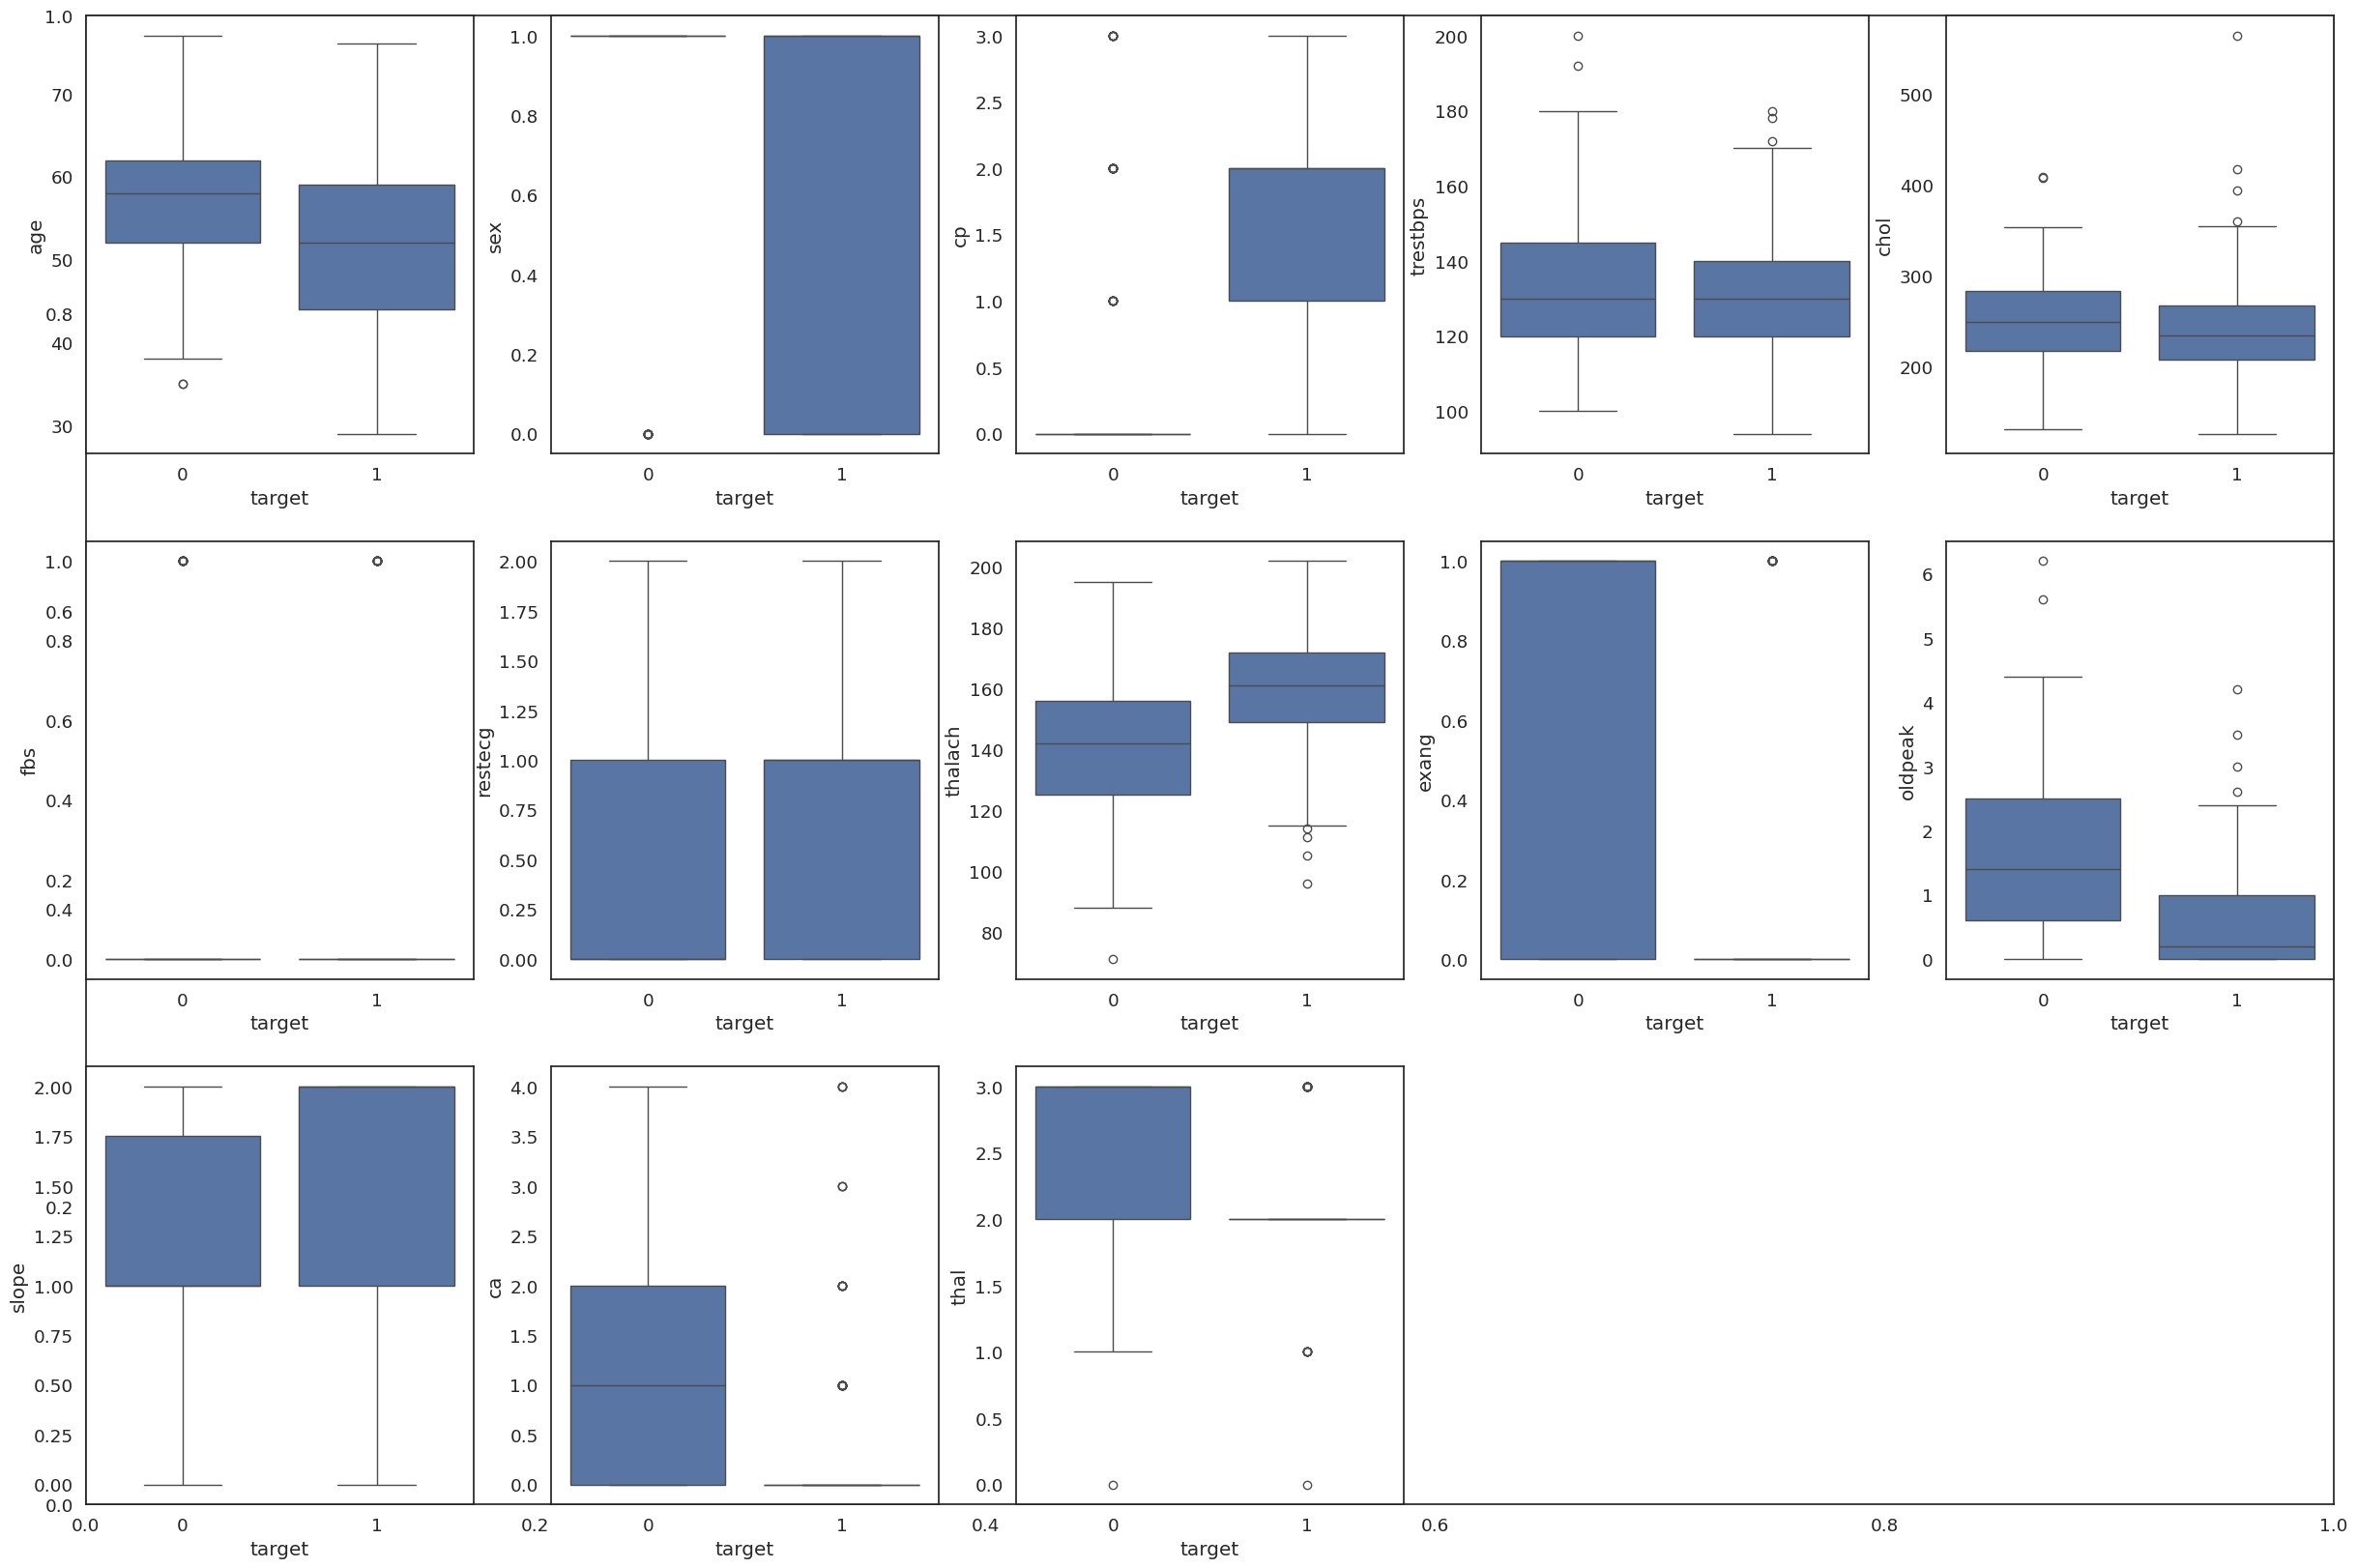

In [ ]:
sns.set_theme(style="white", font_scale=1.2)
plt.subplots(figsize = (30,20))
plt.subplot(3,5,1)
sns.boxplot(x='target', y='age', data=data)
plt.subplot(3,5,2)
sns.boxplot(x='target', y='sex', data=data)
plt.subplot(3,5,3)
sns.boxplot(x='target', y='cp', data=data)
plt.subplot(3,5,4)
sns.boxplot(x='target', y='trestbps', data=data)
plt.subplot(3,5,5)
sns.boxplot(x='target', y='chol', data=data)
plt.subplot(3,5,6)
sns.boxplot(x='target', y='fbs', data=data)
plt.subplot(3,5,7)
sns.boxplot(x='target', y='restecg', data=data)
plt.subplot(3,5,8)
sns.boxplot(x='target', y='thalach', data=data)
plt.subplot(3,5,9)
sns.boxplot(x='target', y='exang', data=data)
plt.subplot(3,5,10)
sns.boxplot(x='target', y='oldpeak', data=data)
plt.subplot(3,5,11)
sns.boxplot(x='target', y='slope', data=data)
plt.subplot(3,5,12)
sns.boxplot(x='target', y='ca', data=data)
plt.subplot(3,5,13)
sns.boxplot(x='target', y='thal', data=data)
plt.show()

#### Create a pairplot to display pairwise relationship. See [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for further details. This has been done for you.

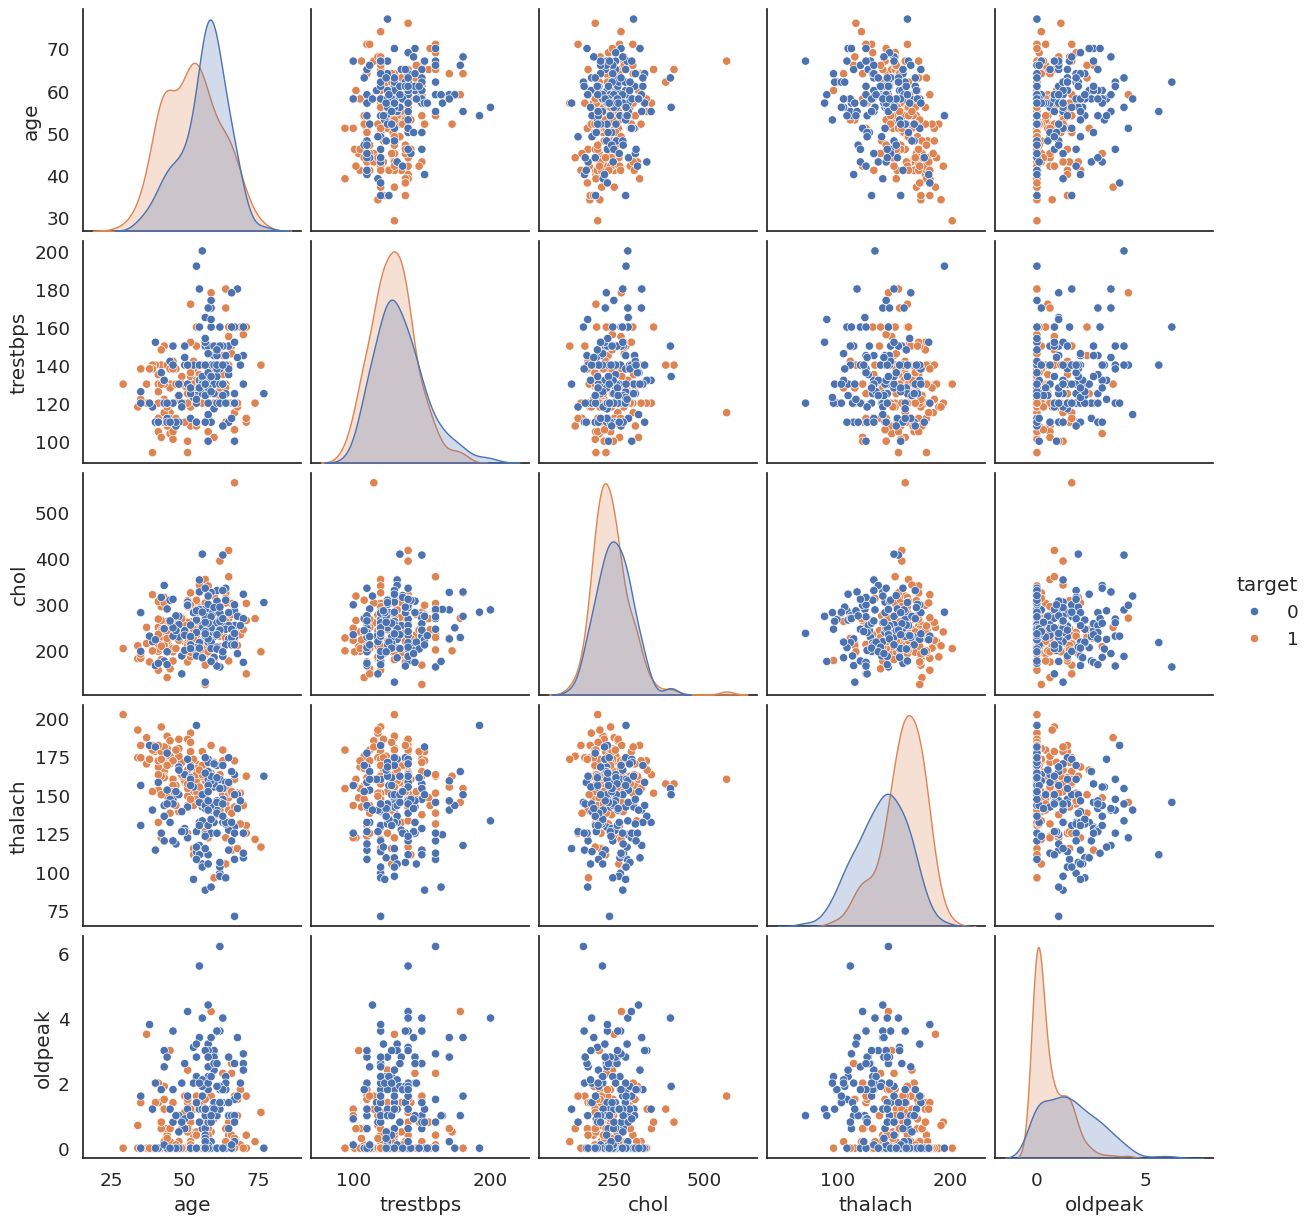

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Select a subset of features for visualization
sns.pairplot(data[['age','trestbps','chol','thalach','oldpeak','target']], hue='target')

<Axes: >

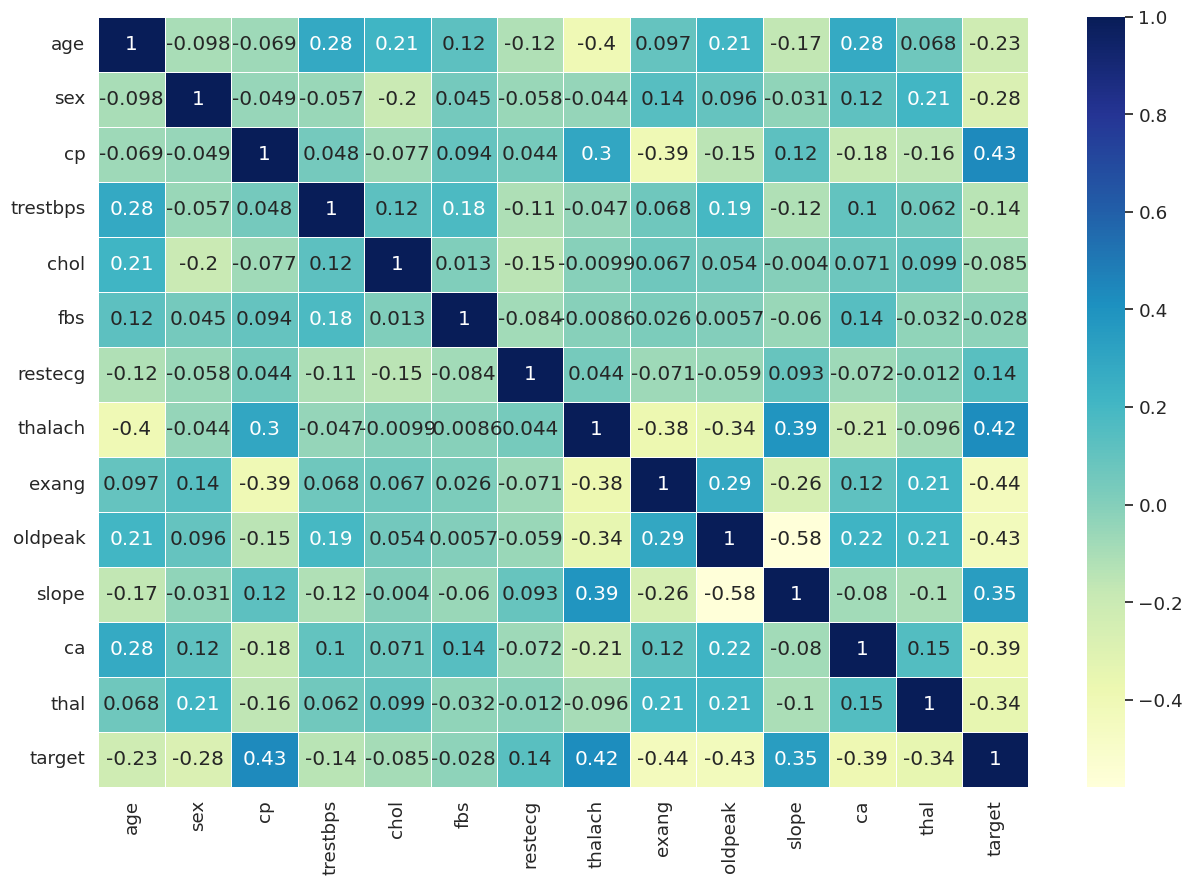

In [ ]:
# Plot heatmap showing correlation between different features
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

### Extract target and descriptive features (1 point)

#### Separate the target and features from the data.

In [ ]:
# Store all the features from the data in X
X = data.drop('target',axis=1)

# Store all the labels in y
y = data['target']

In [ ]:
# Convert data to numpy array
X = X.to_numpy()
y = y.to_numpy()


### Create training and validation datasets (1 point)


We will split the dataset into training and validation set. Generally in machine learning, we split the data into training,
validation and test set (this will be covered in later chapters). The model with best performance on the validation set is used to evaluate perfromance on
the test set which is the unseen data. In this assignment, we will using `train set` for training and evaluate the performance on the `validation set` for various
model configurations to determine the best hyperparameters (parameter setting yielding the best performance).

Split the data into training and validation set using `train_test_split`.  See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details. To get consistent result while splitting, set `random_state` to the value defined earlier. We use 80% of the data for training and 20% of the data for validation. This has been done for you.

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(
    X, y, test_size=0.2, random_state=random_state)

## Training Decision Tree-based Classifiers (18 points)


### Exercise 1: Learning a Decision Tree (10 points)

#### We will use the `sklearn` library to train a Decision Tree classifier. Review ch.4 and see [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# tree visualization helper function
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

"""
clf: DecisionTreeClassifier

Returns a bytes object representing the image of the tree
"""
def get_tree_image(clf):
    dot_data = StringIO()
    feature_names=data.drop('target',axis=1).columns
    class_names=["No Disease", "Heart Disease"]
    export_graphviz(clf, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names=feature_names,
                    class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    return graph.create_png()

# #### Exercise 1a: Fit and interpret a decision tree. (6 points)

#### Fit Decision trees using the Gini index and entropy-based impurity measure.

#### Set the random_state to the value defined above. Keep all other parameters at their default values.

#### Report the training and validation set accuracies for each classifier.

In [ ]:
#gini decision tree fitting using X_train and y_train
gini_clf = DecisionTreeClassifier( criterion='gini', random_state=random_state)
gini_clf.fit(X_train, y_train)

#compute accuracies
accuracyTrain = gini_clf.score(X_train, y_train)
accuracyVal = gini_clf.score(X_val, y_val)

#reporting the accuracies
print(f"Gini training accuracy: {accuracyTrain:.4f}")
print(f"Gini validation accuracy: {accuracyVal:.4f}")

#entropy decision tree fitting using X_train and y_train
ent_clf = DecisionTreeClassifier( criterion='entropy', random_state=random_state)
ent_clf.fit(X_train, y_train)

#compute the accuracies
accuracyTrainEnt = ent_clf.score(X_train, y_train)
accuracyValEnt = ent_clf.score(X_val, y_val)

#reporting the accuracies
print(f"Entropy training accuracy: {accuracyTrainEnt:.4f}")
print(f"Entropy validation accuracy: {accuracyValEnt:.4f}")

Gini training accuracy: 1.0000
Gini validation accuracy: 0.8361
Entropy training accuracy: 1.0000
Entropy validation accuracy: 0.8361


#### Visualize the Decision Tree with the best validation performance.

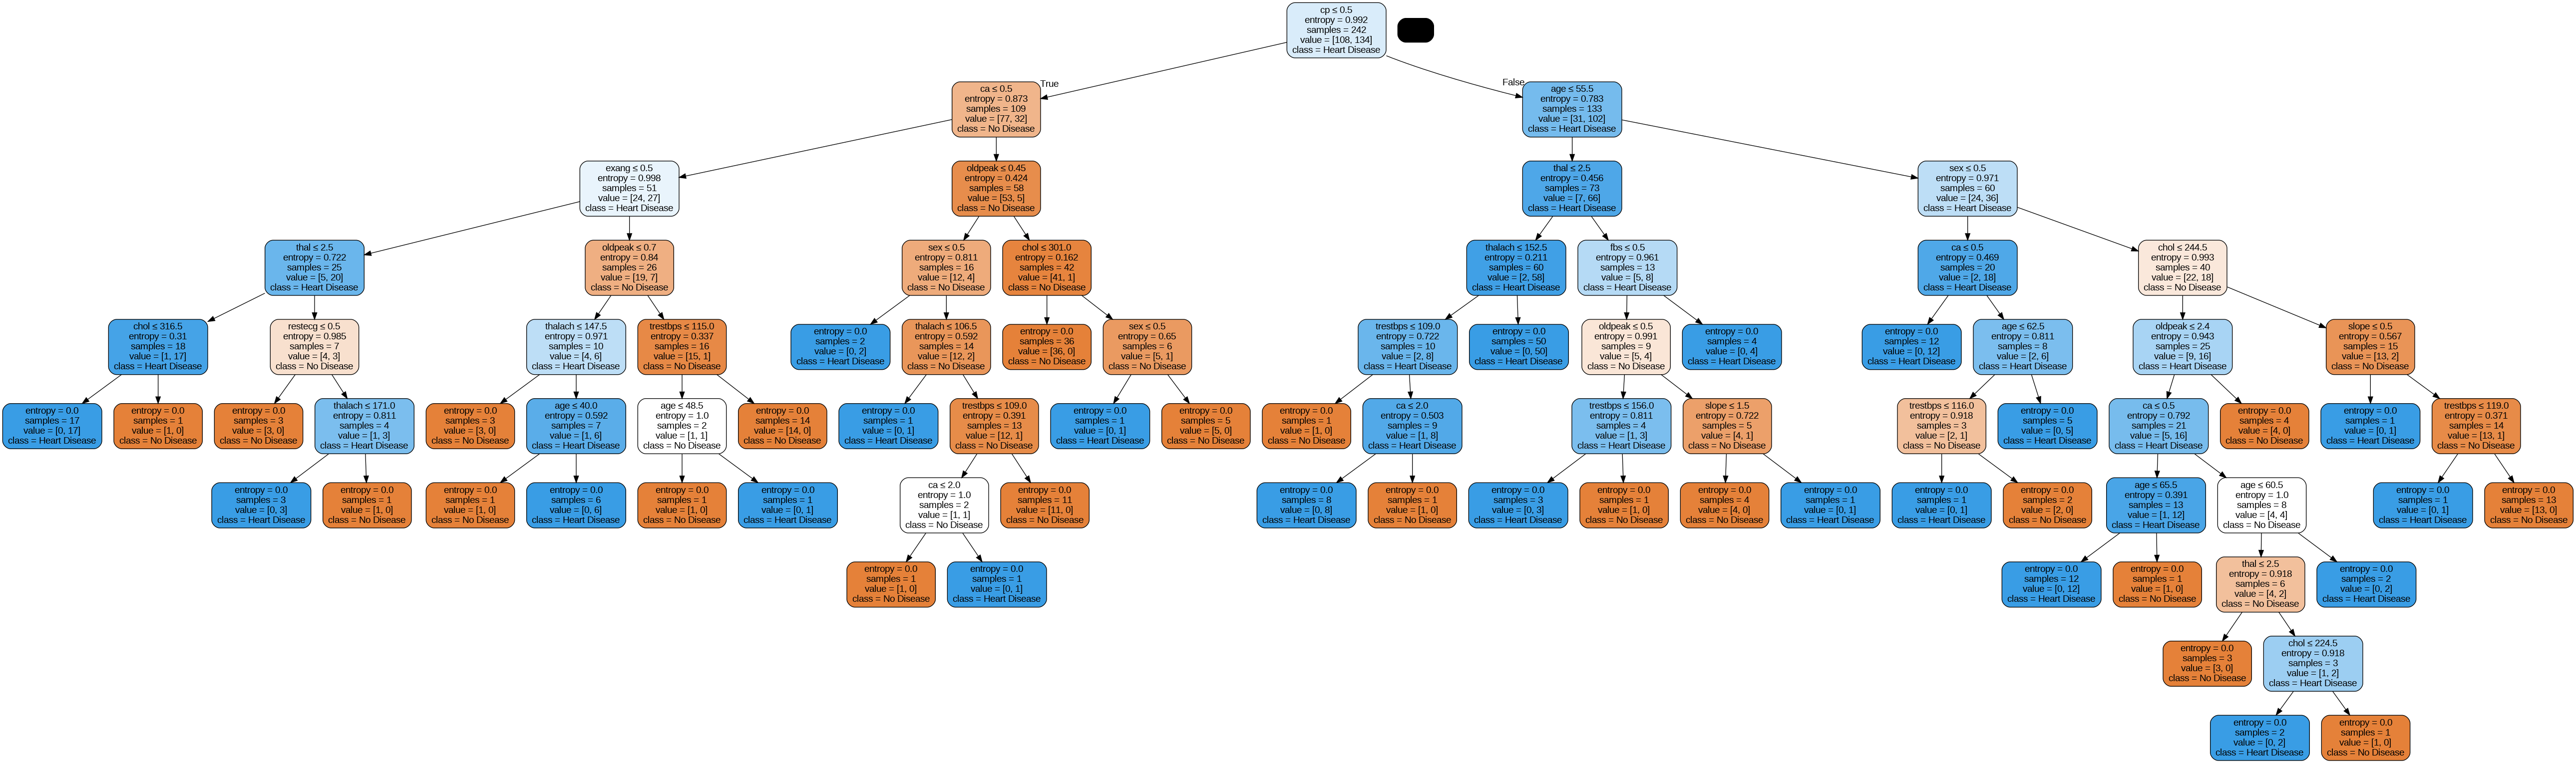

In [ ]:
best_clf=ent_clf
tree_image=get_tree_image(best_clf)
Image(tree_image)

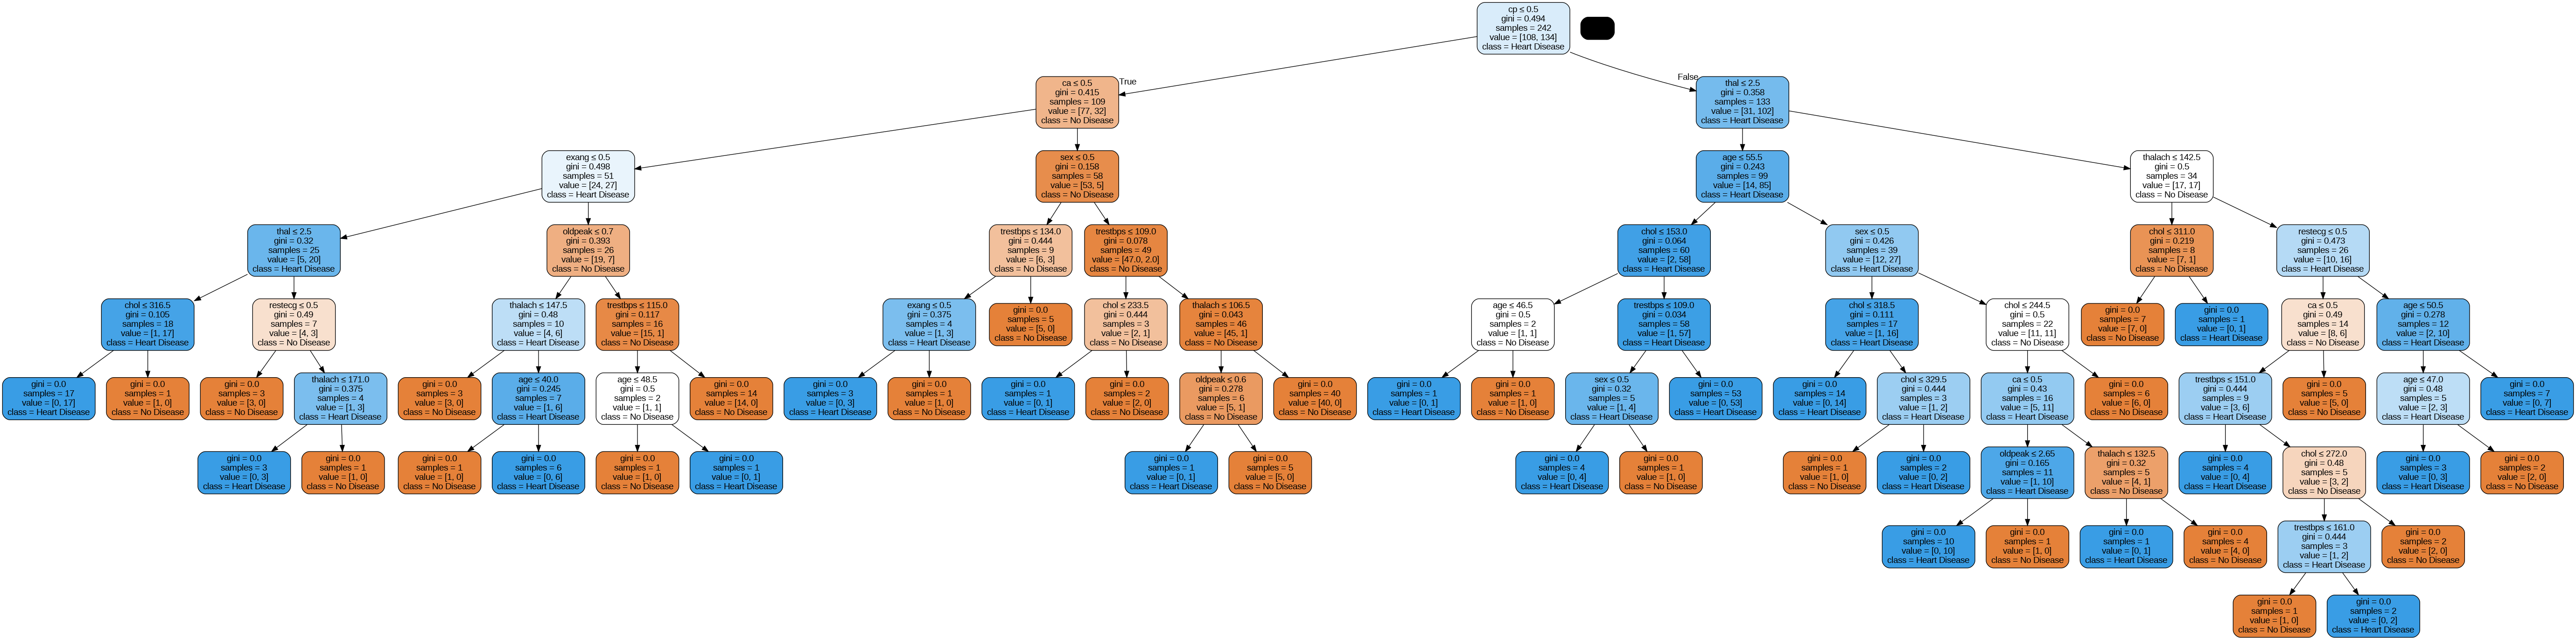

In [ ]:
best_clf=gini_clf
tree_image=get_tree_image(best_clf)
Image(tree_image)

#### Indicate the most informative descriptive feature (with the threshold) and briefly explain why this is the most informative (from an algorithmic viewpoint).

**Answer:** The most informative descriptive feature is cp witht he threshold cp ≤ 0.5. This is most informative because it provides the greatest information gain when splitting the data here.

#### Briefly comment on the tree's depth and what factors may contribute to the shallowness/complexity of the tree.


**Answer:** The entropy tree (depth of 9) is slightly deeper than the gini tree (depth of 8). Some factors that may influence the complexity of the tree are theamount of features included in the data set and the overall diversity of the data set as greater features/diversity may lead to more nodes forming.

#### Show how one can interpret the tree by specifying the rule from its left most branch.

**Answer:** if cp ≤ 0.5 and ca ≤ 0.5 and exang ≤ 0.5 and thal ≤ 2.5 and chol ≤ 316.5 and gini = 0.0: predict Heart Disease

#### Exercise 1b: Preprune a decision tree. (2 points)

#### Next, let's try pruning the tree to see if we can improve the classifier's generalization performance.

#### Preprune a decision tree by varying the `max_depth` among {None (no depth control), 1,3,5,7}.

#### Set the criterion to entropy and the random_state to the value defined above. Keep all other parameters at their default values.

#### Report the training and validation set accuracies for each classifier.

In [ ]:
#checking the depth of each tree
print(ent_clf.get_depth())
print(gini_clf.get_depth())

#testig each of these
max_depth = [None, 1, 3, 5, 7]


#gettng training/validation accuracies for each
for i in max_depth:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=random_state)
    clf.fit(X_train, y_train)

    accuracyTrain = clf.score(X_train, y_train)
    accuracyVal = clf.score(X_val, y_val)

    print(f"max_depth: {i}")
    print(f"Entropy training accuracy: {accuracyTrain:.4f}")
    print(f"Entropy validation accuracy: {accuracyVal:.4f}")
    print("\n")

9
8
max_depth: None
Entropy training accuracy: 1.0000
Entropy validation accuracy: 0.8361


max_depth: 1
Entropy training accuracy: 0.7397
Entropy validation accuracy: 0.8361


max_depth: 3
Entropy training accuracy: 0.8182
Entropy validation accuracy: 0.8197


max_depth: 5
Entropy training accuracy: 0.9421
Entropy validation accuracy: 0.8525


max_depth: 7
Entropy training accuracy: 0.9917
Entropy validation accuracy: 0.8361




#### Analyze the effect of increasing tree depth on training and validation performance.

**Answer:** For training performance, there is a clear positive correlation between increasing the tree depth and higher accuracy. However, for validation accuracy, increasing tree depth does not have a clear pos/neg correlation but seems to peak at ~5.

#### Exercise 1c: Postprune a decision tree. (2 points)

#### Implement reduced error pruning on the two decision trees that you previously trained in Exercise 1a. Use the validation set to decide which nodes to prune.

#### Report the validation set accuracies for each classifier after pruning.

#### The pruning function is partly writen, please fill in the TODO part. Review ch.4.4.4 for more details.


In [ ]:
# Fit new trees if you want to keep the trees in 1a unmodified
gini_clf = DecisionTreeClassifier(criterion='gini', random_state=random_state)
gini_clf.fit(X_train, y_train)


entropy_clf = DecisionTreeClassifier(criterion='entropy',
                                     random_state=random_state)
entropy_clf.fit(X_train, y_train)


def reduced_error_pruning(dtree, X_val, y_val):
    """
    Perform reduced error pruning on a decision tree classifier.

    This function directly modifies the decision tree passed as an argument.

    Args:
    dtree: DecisionTreeClassifier
        The decision tree to prune, must be already fitted.
    X_val: array-like
        Validation features used to prune the tree.
    y_val: array-like
        Validation labels used to determine pruning effectiveness.

    Returns:
    dtree: DecisionTreeClassifier
        The pruned decision tree.
    """

    # Access the internal tree structure to identify non-leaf nodes
    non_leaf_nodes = [i for i in range(dtree.tree_.node_count) if dtree.tree_.children_left[i] != dtree.tree_.children_right[i]]

    # Track the best accuracy and corresponding tree configuration. initialize
    # with original accuracy.
    best_acc = dtree.score(X_val, y_val)

    # Iterate over non-leaf nodes in reverse order to consider pruning from the
    # bottom up
    for i in reversed(non_leaf_nodes):
        # Store current node children to restore if needed
        left, right = dtree.tree_.children_left[i], dtree.tree_.children_right[i]

        # Temporarily make the node a leaf
        dtree.tree_.children_left[i], dtree.tree_.children_right[i] = -1, -1

        # Calculate the accuracy of the tree with the node pruned (turned into
        # a leaf)
        temp_acc = dtree.score(X_val, y_val)

        if temp_acc < best_acc: # Revert pruning if accuracy decreases
            # Restore the node to its original state
            dtree.tree_.children_left[i], dtree.tree_.children_right[i] = left, right
        else:
            # Update the best accuracy observed
            best_acc = temp_acc

    return dtree  # Return the modified tree


#using validation
pruned_entropy = reduced_error_pruning(entropy_clf, X_val, y_val)
pruned_entropy_acc = pruned_entropy.score(X_val, y_val)
print(f"Validation accuracy of entropy tree after pruning: {pruned_entropy_acc:.4f}")

pruned_gini = reduced_error_pruning(gini_clf, X_val, y_val)
pruned_gini_acc = pruned_gini.score(X_val, y_val)
print(f"Validation accuracy of gini tree after pruning: {pruned_gini_acc:.4f}")

Validation accuracy of entropy tree after pruning: 0.9344
Validation accuracy of gini tree after pruning: 0.9180


### Exercise 2: Learning an Ensemble of Decision Trees (8 points)

#### We will use the `sklearn` library to implement bagging and boosting. Review ch.4 and read more on [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Exercise 2a: Fit a Random Forest. (4 points)

#### Fit different Random Forest classifiers by varying the number of trees among {10, 50, 100, 400, 1000}.

#### Set the `criterion` to entropy and set the random_state to the value defined above. Keep all other parameters at their default values.

#### Report the validation set accuracies for each classifier.

In [ ]:
#numbers of trees
trees = [10, 50, 100, 400, 1000]

for i in trees:
    rf = RandomForestClassifier(n_estimators= i, criterion='entropy',
                                random_state=random_state)
    rf.fit(X_train, y_train)

    accuracyTrain = rf.score(X_train, y_train)
    accuracyVal = rf.score(X_val, y_val)

    print(f"number of trees: {i}")
    print(f"Entropy training accuracy: {accuracyTrain:.4f}")
    print(f"Entropy validation accuracy: {accuracyVal:.4f}")
    print("\n")


number of trees: 10
Entropy training accuracy: 0.9959
Entropy validation accuracy: 0.9016


number of trees: 50
Entropy training accuracy: 1.0000
Entropy validation accuracy: 0.8852


number of trees: 100
Entropy training accuracy: 1.0000
Entropy validation accuracy: 0.9016


number of trees: 400
Entropy training accuracy: 1.0000
Entropy validation accuracy: 0.8689


number of trees: 1000
Entropy training accuracy: 1.0000
Entropy validation accuracy: 0.8852




#### Comment on the effect of increasing the number of trees on validation performance. Compare the performance of the best performing Random Forest classifier against the Decision Tree Classifier trained with entropy (Ex. 1a) and explain any difference.

**Answer:** Increasing the number of trees does not have a clear pos/neg correlation to the accuracy of the validation performance. The best performing Random Forest classifier (10 trees/ 100 trees) had a validation accuracy of 0.9016 as compared to the Decision tree classifier trained with entropy that had an accuracy of 0.8361. Here, the random forest model had a much higher accuracy than the model from 1a. In 1a, the single decision tree may have overfit the training data while the random Forest is trained with mroe diversity and generalizes well, meaning it will perform better in validation.

#### Exercise 2b: Fit a Gradient Boosted Decision Tree (GBDT). (4 points)

#### Fit different GBDTs by varying the number of boosting steps/trees added among {5, 10, 20, 50, 100, 200}.

#### Set the `n_iter_no_change` to 100, `validation_fraction=0.2`, and random_state to the value defined above. Keep all other parameters at their default values.

#### Report the training and validation set accuracies for each classifier.

In [ ]:
#numbers of trees
trees = [5, 10, 20, 50, 100, 200]

for i in trees:
    gbdt = GradientBoostingClassifier(n_estimators = i, n_iter_no_change = 100, validation_fraction=0.2, random_state=random_state)
    gbdt.fit(X_train, y_train)

    accuracyTrain = gbdt.score(X_train, y_train)
    accuracyVal = gbdt.score(X_val, y_val)

    print(f"number of trees: {i}")
    print(f"training accuracy: {accuracyTrain:.4f}")
    print(f"validation accuracy: {accuracyVal:.4f}")
    print("\n")

number of trees: 5
training accuracy: 0.8554
validation accuracy: 0.8525


number of trees: 10
training accuracy: 0.8884
validation accuracy: 0.8689


number of trees: 20
training accuracy: 0.9174
validation accuracy: 0.8852


number of trees: 50
training accuracy: 0.9339
validation accuracy: 0.8852


number of trees: 100
training accuracy: 0.9628
validation accuracy: 0.8852


number of trees: 200
training accuracy: 0.9628
validation accuracy: 0.8525




#### Comment on the effect of increasing the number of trees on validation performance. Compare the performance of the best performing GBDT against that of the best performing Random Forest classifier (Ex. 2a) and Decision Tree classifier trained with entropy (Ex. 1a).

**Answer:** Here, increasing the number of trees seems to increase the validation accuracy performance up to a certain extent (~100) before falling back down when the number gets too high. The best performing GBDT had a validation accuracy of 0.8852 which is inbetween the best performing random forest 2a) 0.9016 and the decision tree trained with entropy 1a) 0.8361. It appears that random forest was the most accurate model to use on this data and was able to be very generalizable across the validation set. GBDT may have had some influence of overfitting, evidenced in the decreased accuracy when number of trees increased too high. The least accurate method was the single decision tree because it likely overfits on training data.